# Telecommunication Industry User Churn Prediction
## Author: Hai (https://www.linkedin.com/feed/)

## **In** this project, we use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

## Data source: https://www.kaggle.com/blastchar/telco-customer-churn

# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [2]:
import pandas as pd
## will show all the columns
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns                     ##Seaborn是基于matplotlib的图形可视化python包
import matplotlib.pyplot as plt

#import plotly.offline as py #visualization
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## ignore warnings:
import warnings
warnings.filterwarnings('ignore')

## read CSV data:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
data.describe()
from IPython.core.interactiveshell import InteractiveShell  # 打印出每一步的运行
InteractiveShell.ast_node_interactivity = "all"

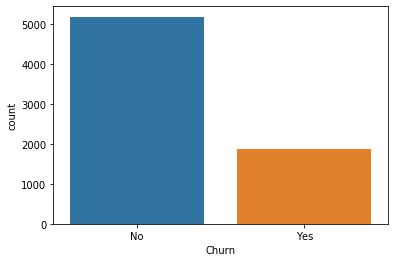

What is the value counts for column 'Churn'? And what is churn rate?
No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


In [4]:
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data = data)
plt.show()

print("What is the value counts for column 'Churn'? And what is churn rate?")
print(data['Churn'].value_counts())
print(data['Churn'].value_counts()/len(data))

In [5]:
print ("Missing values ?:  ",  data.isnull().sum().values.sum())
print ("Unique values ?: \n", data.nunique())

Missing values ?:   0
Unique values ?: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Part 1.2: Data exploring with plotly

In [6]:
import plotly
plotly.__version__

'4.8.1'

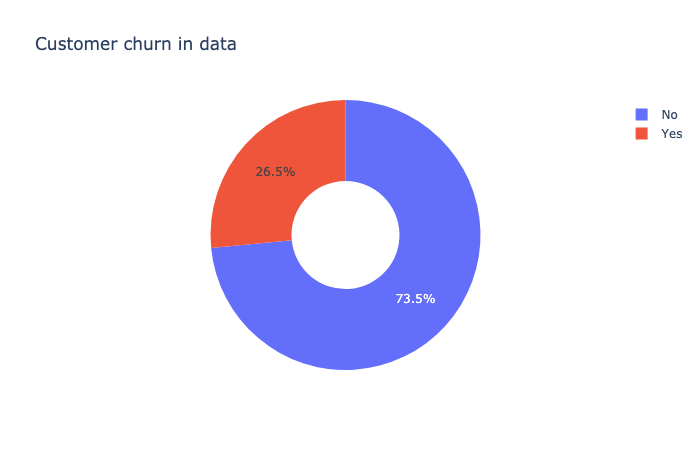

In [7]:
labels = data["Churn"].value_counts().keys().tolist()   #yes/no
values = data["Churn"].value_counts().values.tolist()   #count 出来的多少

# fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
# fig.update_layout(autosize=True)  也是打印出图像

pie_data = [go.Pie(labels = labels, values = values, hole = .4, hoverinfo="skip")]
layout = go.Layout(dict(title = "Customer churn in data",))

fig = go.Figure(data = pie_data, layout = layout)
fig.show(renderer="png")   #显示图像

## Check distribution of data for some features: how this feature is distributed for churned and not-churned customers respectively?

In [13]:
## define barplot method to visualize data distribution, just a different way as pie chart
def feature_barplot(feature):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))   #churn[] 我在下面的select data 中定义的
    data_1 = churn[feature].value_counts(normalize=True).rename('percentage')\
                           .mul(100).reset_index().rename(columns={'index':feature})  #这里自己带入一个个往后面加就知道了，相当于先制作了一个表格
    data_2 = no_churn[feature].value_counts(normalize=True).rename('percentage')\
                           .mul(100).reset_index().rename(columns={'index':feature})
    sns.barplot(x = feature, y = "percentage", data = data_1, ax = axes[0])
    axes[0].set_title("Churned customers")
    sns.barplot(x = feature, y = "percentage", data = data_2, ax = axes[1])
    axes[1].set_title("Non-churned customers")
    plt.show()    


In [9]:
from plotly.subplots import make_subplots

#replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})
## select data
churn = data.loc[data['Churn'] == "Yes"]  ##部分代码解释：https://www.w3resource.com/pandas/dataframe/dataframe-loc.php
no_churn = data.loc[data['Churn'] == "No"]  #https://www.cnblogs.com/chenhuabin/p/10485549.html#_label2_1
                                            # 注意哦loc是选行行，so 一行的信息都有
def feature_pie(feature):
    labels_1 = churn[feature].value_counts().keys().tolist()
    values_1 = churn[feature].value_counts().values.tolist()

    labels_2 = no_churn[feature].value_counts().keys().tolist()
    values_2 = no_churn[feature].value_counts().values.tolist()
    
    ## Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels = labels_1, values = values_1), 1, 1)
    fig.add_trace(go.Pie(labels = labels_2, values = values_2), 1, 2)
    ## Use hole to create a donut-like pie chart
    fig.update_traces(hole = .4, hoverinfo = "skip")
    ## layout info
    fig.update_layout(title_text = feature + " distribution in customer churn",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churned', x=0.17, y=0.5, font_size=13, showarrow=False),
                 dict(text='Not Churned', x=0.86, y=0.5, font_size=13, showarrow=False)])
    fig.update_layout(height = 400, width = 800, margin = dict(l=80, r=80, t=60, b=50))
    fig.show(renderer="png")


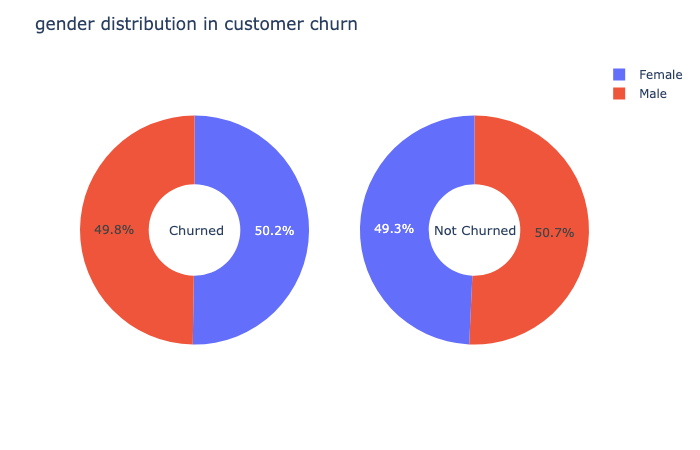

In [10]:
feature_pie("gender")

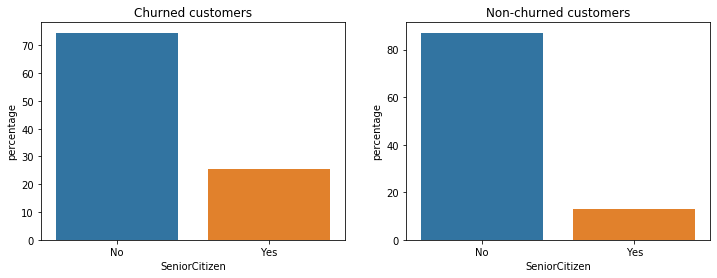

In [14]:
feature_barplot("SeniorCitizen")

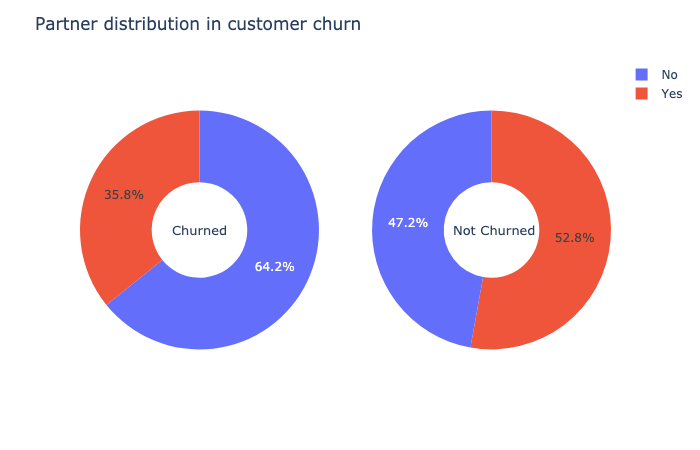

In [15]:
feature_pie("Partner")

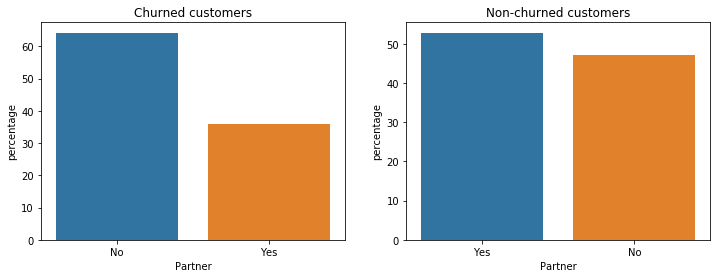

In [16]:
feature_barplot("Partner")

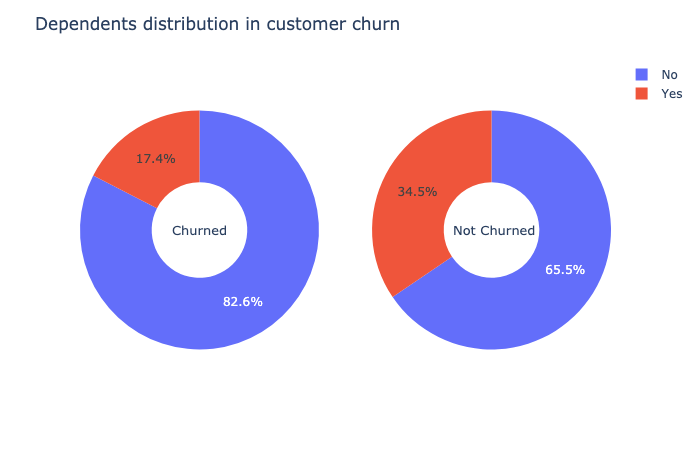

In [17]:
feature_pie("Dependents")

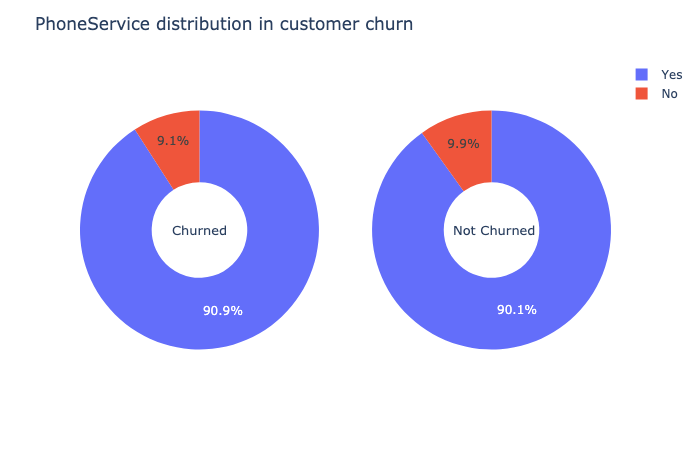

In [18]:
feature_pie("PhoneService")

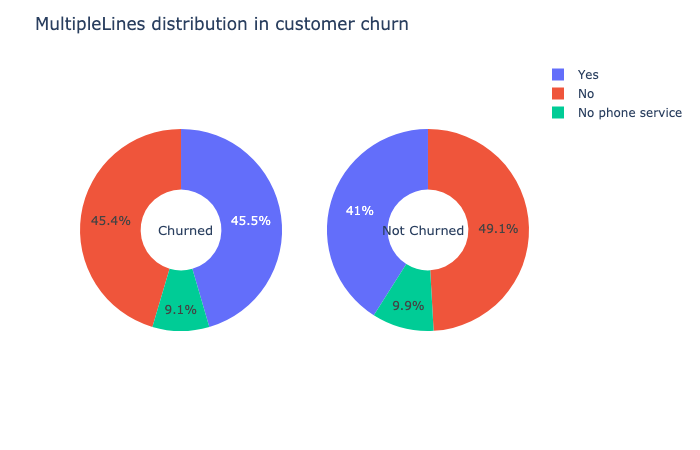

In [19]:
feature_pie("MultipleLines")

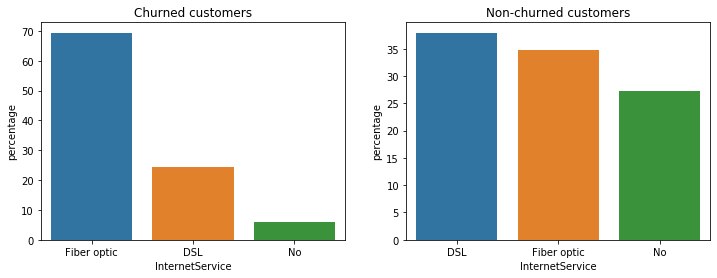

In [20]:
feature_barplot("InternetService")

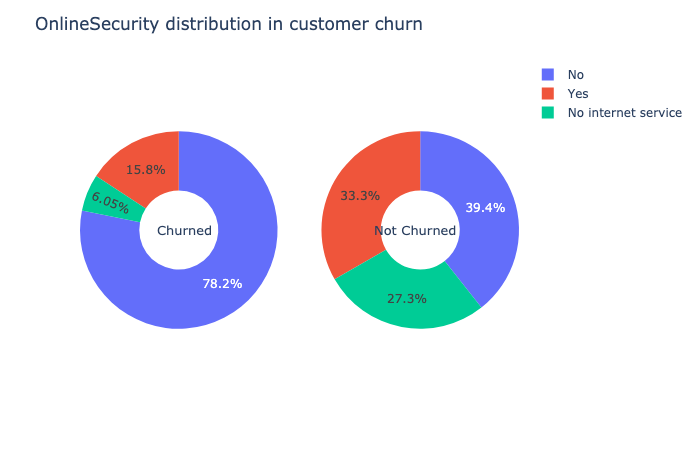

In [21]:
feature_pie("OnlineSecurity")

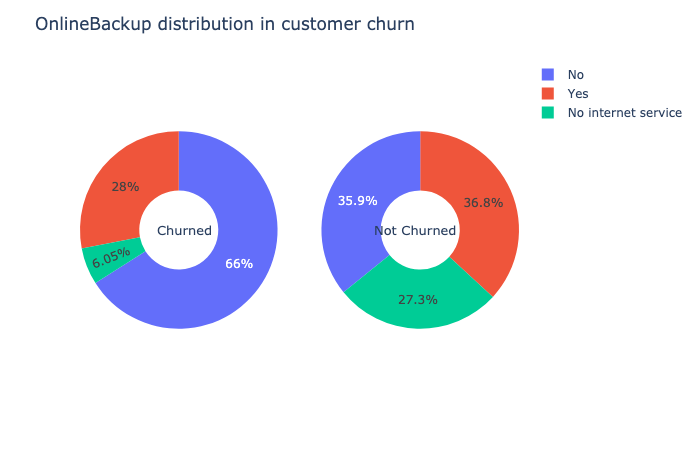

In [22]:
feature_pie("OnlineBackup")

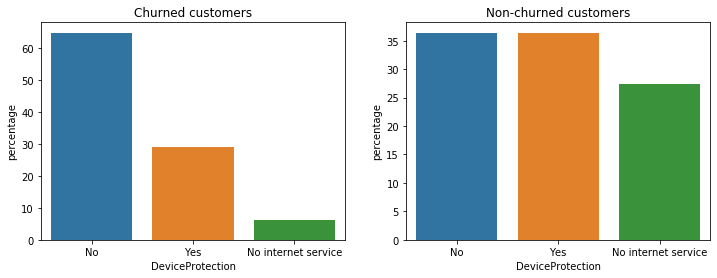

In [23]:
feature_barplot("DeviceProtection")

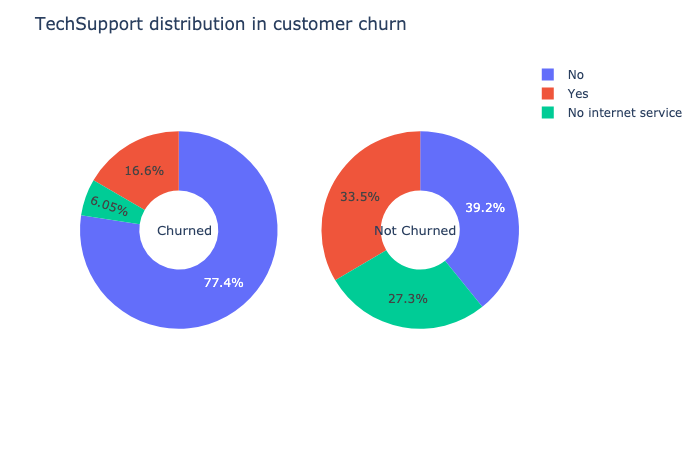

In [24]:
feature_pie("TechSupport")

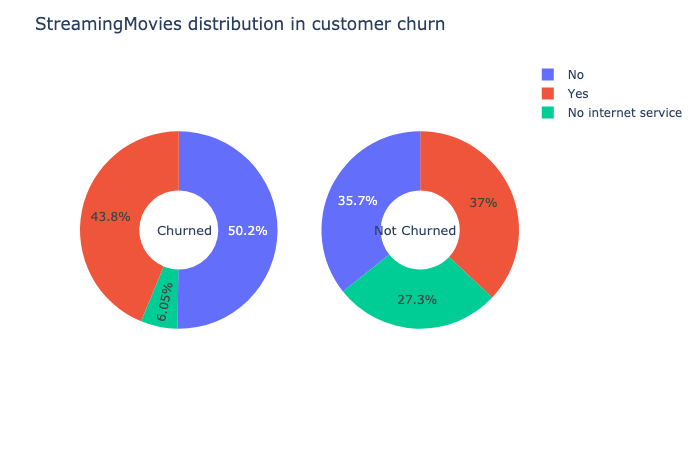

In [25]:
feature_pie("StreamingMovies")

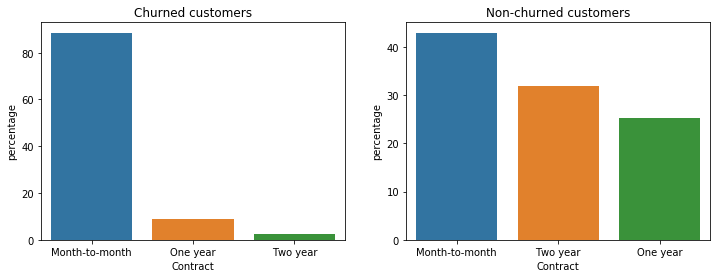

In [26]:
feature_barplot("Contract")

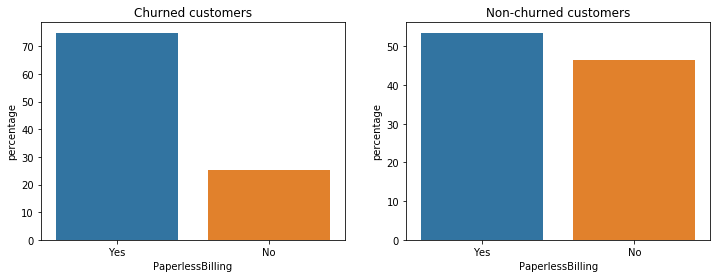

In [27]:
feature_barplot("PaperlessBilling")

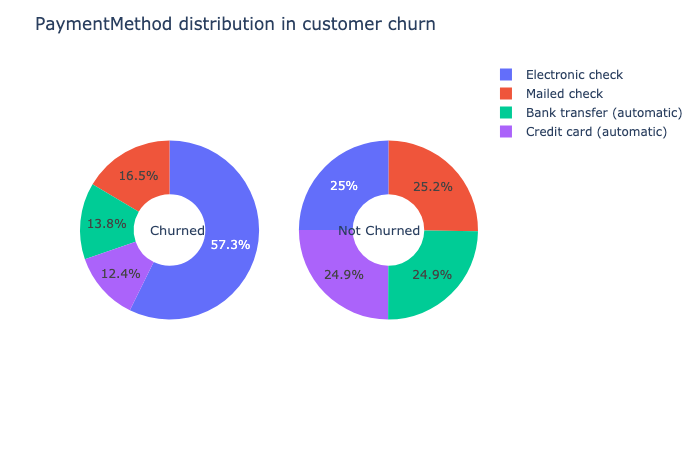

In [28]:
feature_pie("PaymentMethod")

In [29]:
#data.groupby(['tenure', 'Churn']).size().unstack()\
#        .plot(kind='bar', title="tenure distribution for churn data", figsize=(12,6))
#plt.ylabel('count')
#plt.xlabel('tenure')

#function for plotting histogram with certain column in customer attrition data:

def feature_hist(column) :
    
    trace1 = go.Histogram(x = churn[column], histnorm = "percent", name = "Churned Customers",
                          marker = dict(line = dict(width = .5, color = "black")), hoverinfo = 'skip')#你看是连着的
    trace2 = go.Histogram(x = no_churn[column], histnorm = "percent", name = "Non-churned Customers",
                          marker = dict(line = dict(width = .5, color = "black")), hoverinfo = 'skip')
    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = column, zerolinewidth = 1,
                                             ticklen = 5, gridwidth = 2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = "percent", zerolinewidth = 1,
                                             ticklen = 5, gridwidth = 2)))
    fig  = go.Figure(data = [trace1, trace2],layout = layout)
    fig.show(renderer='png')

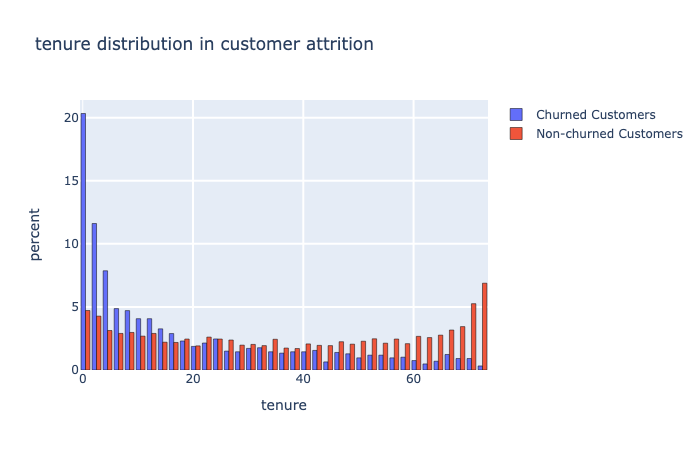

In [30]:
feature_hist("tenure")

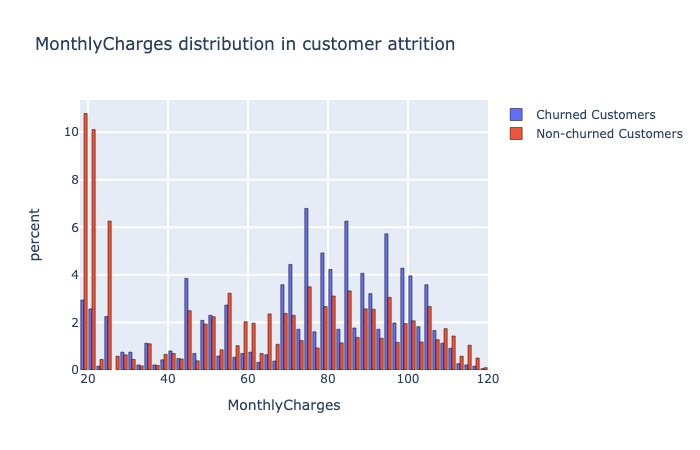

In [31]:
feature_hist("MonthlyCharges")

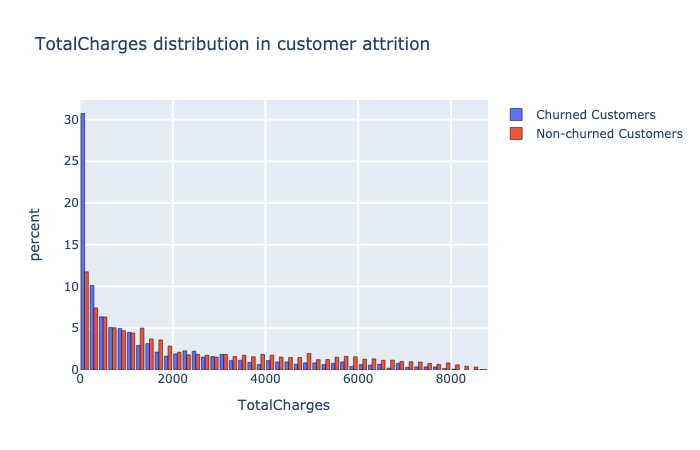

In [32]:
feature_hist("TotalCharges")

## Need to be careful with feature 'TotalCharges', due to the white space

In [33]:
## replacing white spaces with NaN
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
print(f"Only {round(sum(data['TotalCharges'].isna())/len(data)*100, 3)}% of the 'TotalCharges' is NaN")
                                                                #https://blog.csdn.net/qq_37744263/article/details/81835543
## drop null values from total charges column:
data = data[~data["TotalCharges"].isna()]
data = data.reset_index()[data.columns]
      
## convert to float type
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

Only 0.156% of the 'TotalCharges' is NaN


In [34]:
# Compare the median of <<numeric features>>between the two classes
data.groupby('Churn').median()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,38,64.45,1683.60
Yes,10,79.65,703.55


In [41]:
def scatter_matrix(data, features)  :
    classes = data["Churn"].unique().tolist()  #classes=yes/no
    class_map  = {classes[k] : k for k in range(len(classes))}   # length =2, range(0,2)， {'No': 0, 'Yes': 1}， 

    class_colors = ["red" if cl == "Yes" else "blue" for cl in data["Churn"]] #red = churn
    
    trace = go.Splom(dimensions = [dict(label = features[0], values = data[features[0]]),
                                   dict(label = features[1], values = data[features[1]]),
                                   dict(label = features[2], values = data[features[2]])],
                     hoverinfo = "skip",
                     marker = dict(color = class_colors, #colorscale = 'Portland',
                                   size = 3,
                                   showscale = False))
    
    layout = go.Layout(dict(title  = "Scatter plot for numerical features in data",
                            autosize = False,
                            height = 800, width = 800,
                            dragmode = "select"))
    fig = go.Figure(data = [trace], layout = layout )
    fig.show(renderer='png', width=720, height = 640)

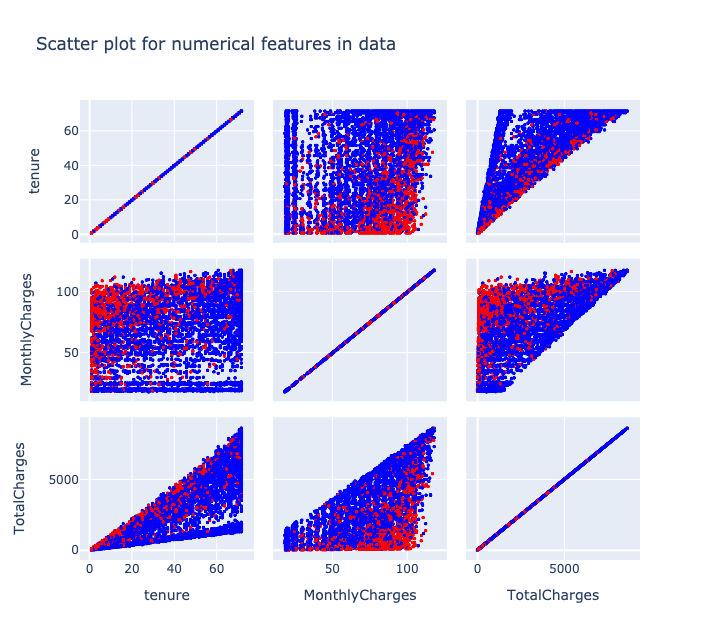

In [42]:
scatter_matrix(data, ["tenure", "MonthlyCharges", "TotalCharges"])

## Check the feature 'tenure', see how the histogram looks like aross different bins

In [46]:
#%matplotlib inline
## features contain 3 strings: ["tenure", "MonthlyCharges", "TotalCharges"]
#这代码很有编程的味道
def dist_plot(data, features):
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    colors = ['r', 'g', 'b']
    for i in range(len(features)):
        sns.distplot(data.loc[data.Churn == "Yes", features[i]],\
                     kde = True, label = "Churned", ax = axes[i], color = 'r', hist_kws = {"alpha":0.5})
        sns.distplot(data.loc[data.Churn ==  "No", features[i]],\
                     kde = True, label = "Non-churned", ax = axes[i], color = 'b', hist_kws = {"alpha":0.5})
        axes[i].legend(loc="upper right")

    fig.suptitle("Numerical feature distribution among churned and not-churned customers", fontsize=20)
    fig.subplots_adjust(top=0.85)
    plt.show()

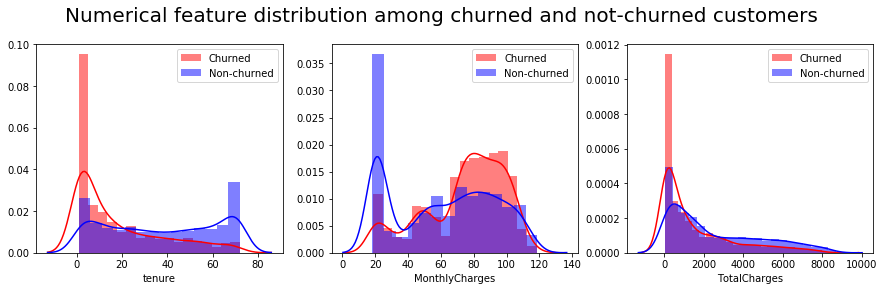

In [47]:
dist_plot(data, ["tenure", "MonthlyCharges", "TotalCharges"])

In [48]:
# Tenure to categorical column
def tenure_group(data) :
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "Tenure_24-36"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "Tenure_36-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure_48-60"
    else :
        return "Tenure_>_60"

data["tenure_group"] = data.apply(lambda data:tenure_group(data), axis = 1)  #1 or ‘columns’: apply function to each row.

In [49]:
## replace label string as integer:
data["Churn"] = data["Churn"].replace({"Yes":1,"No":0})

## separate data (do it again is because I grouped tenure column)
churn = data.loc[data['Churn'] == 1]
no_churn = data.loc[data['Churn'] == 0]

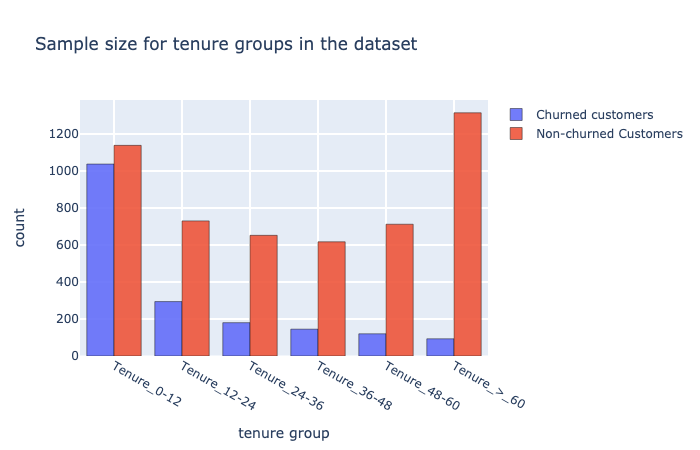

In [50]:
#cusomer attrition in tenure groups，这个挺有用的分析,固定格式常用
churn_tg  =  churn["tenure_group"].value_counts().reset_index()
churn_tg.columns  = ["tenure_group","count"]

no_churn_tg =  no_churn["tenure_group"].value_counts().reset_index()
no_churn_tg.columns = ["tenure_group","count"]

## churned customers:
trace1 = go.Bar(x = churn_tg["tenure_group"]  , y = churn_tg["count"], name = "Churned customers",
                marker = dict(line = dict(width = .5, color = "black")), opacity = .9, hoverinfo = "skip")

## non-churned customers:
trace2 = go.Bar(x = no_churn_tg["tenure_group"] , y = no_churn_tg["count"], name = "Non-churned Customers",
                marker = dict(line = dict(width = .5, color = "black")), opacity = .9, hoverinfo = "skip")

layout = go.Layout(dict(title = "Sample size for tenure groups in the dataset",
                        xaxis = dict(title = "tenure group", zerolinewidth = 1, ticklen = 5, gridwidth = 2),
                        yaxis = dict(title = "count", zerolinewidth = 1, ticklen = 5, gridwidth = 2)))

fig = go.Figure(data = [trace1,trace2], layout = layout)
#py.iplot(fig)
fig.show(renderer='png')

## Data preprocessing

In [51]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           6
dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

label_col = ["Churn"] ## label column

to_be_dropped = ["customerID", "Churn"] ## some columns will be dropped

## categorical columns:
cat_cols = data.nunique()[data.nunique() < 7].keys().tolist()  #超过7的level 是numbercial 数据
cat_cols.remove("Churn")

## numerical columns:
num_cols   = [x for x in data.columns if x not in cat_cols + to_be_dropped]

## use get_dummies for One-Hot Encoding: 把每个level提出来作为一个变量，和R的mode.matrix 类似
new_data = pd.get_dummies(data = data, columns = cat_cols)

## Scale the numerical columns,这样的代码风格是真的不错
scaler = StandardScaler()
scalled_df = scaler.fit_transform(data[num_cols].values)
new_data[num_cols] = scalled_df


## Correlation matrix:

In [53]:
#print ("Missing values ?: ")
#print(new_data.isnull().sum())
#new_data.dtypes


Shape of the correlation matrix: (53, 53)


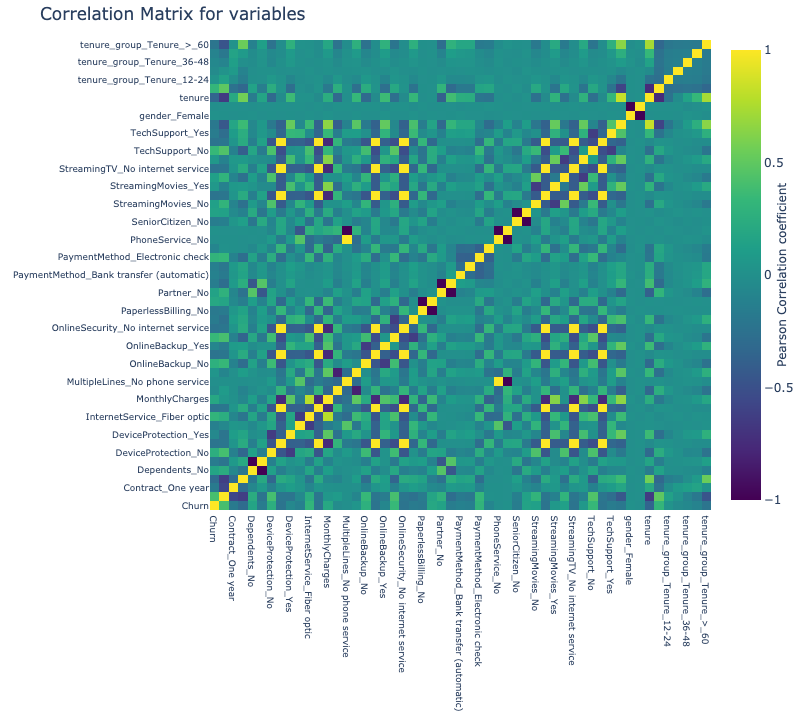

In [54]:
## correlations between features
columns = sorted(list(set(new_data.columns) - set({"customerID"})))
corr = new_data[columns].corr()
corr_array = np.array(corr)
print(f"Shape of the correlation matrix: {corr_array.shape}")

#Plotting
trace = go.Heatmap(z = corr_array, x = columns, y = columns,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient", titleside = "right"))

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height = 800, width = 900, margin  = dict(r = 0, l = 210, t = 40, b = 210),
                        xaxis = dict(tickfont = dict(size = 9)), yaxis = dict(tickfont = dict(size = 9))))

fig = go.Figure(data = [trace],layout = layout)
fig.show(renderer='png', height=720, width=800)

## show heapmap of correlations
#sns.heatmap(corr_array, cmap="YlGnBu")

## Visualizing the dataset with PCA

In [55]:
new_data.head(1)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


,PC1,PC2,Churn
0,-1.231887,-1.708743,Churn=No
1,-0.417166,-0.270997,Churn=No
2,-1.159023,-1.629286,Churn=Yes
3,-0.237915,0.307516,Churn=No
4,-0.738793,-2.484252,Churn=Yes
...,...,...,...
7027,0.905962,0.319797,Churn=No
7028,3.250953,1.482826,Churn=No
7029,-1.133341,-1.233400,Churn=No
7030,-0.268594,-2.059779,Churn=Yes


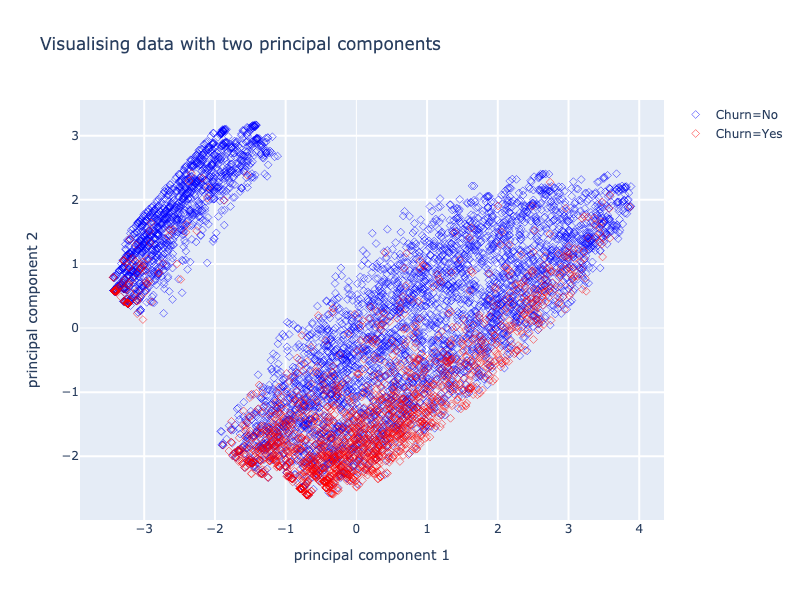

In [56]:
from sklearn.decomposition import PCA

to_be_dropped = ['customerID', 'Churn']
X = new_data[[i for i in new_data.columns if i not in to_be_dropped and 'tenure_' not in i]]
Y = new_data['Churn']

pca = PCA(n_components = 2)
components = pca.fit_transform(X)

pca_data = pd.DataFrame(components, columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y, left_index = True, right_index = True, how = "left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn=Yes",0:"Churn=No"})

def pca_scatter(target, color) :
    trace = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                       y = pca_data[pca_data["Churn"] == target]["PC2"],
                       name = target, mode = "markers", hoverinfo = "skip",
                       marker = dict(color = color, line = dict(width = .5), symbol =  "diamond-open"),)
    return trace

layout = go.Layout(dict(title = "Visualising data with two principal components",
                        xaxis = dict(title = "principal component 1", zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(title = "principal component 2", zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 600))

trace1 = pca_scatter("Churn=Yes", "red")
trace2 = pca_scatter("Churn=No", "blue")

fig = go.Figure(data = [trace2,trace1], layout = layout)
fig.show(renderer = "png", height = 600, width = 800)

In [58]:
# calculate correlation for feature - target pairs:
from scipy.stats import pearsonr
import itertools

new_data.drop(columns=['customerID'], inplace=True)

pearsonCols = set([i for i in new_data.columns if 'tenure_' not in i])
pearsonCols.remove("Churn")

result = []

for feature in pearsonCols:
    try:
        coeff = pearsonr(new_data[feature], new_data['Churn'])
        result.append(((feature, "Churn"), (round(coeff[0], 3), float('{:0.3e}'.format(coeff[1])))))
    except:
        continue

result = sorted(result)

for tup in result:
    print(f"Pearson correlation between '{tup[0][1]}' and '{tup[0][0]}': ({tup[1][0]}, {tup[1][1]})")

Pearson correlation between 'Churn' and 'Contract_Month-to-month': (0.405, 3.343e-275)
Pearson correlation between 'Churn' and 'Contract_One year': (-0.178, 2.814e-51)
Pearson correlation between 'Churn' and 'Contract_Two year': (-0.302, 9.155e-148)
Pearson correlation between 'Churn' and 'Dependents_No': (0.163, 3.897e-43)
Pearson correlation between 'Churn' and 'Dependents_Yes': (-0.163, 3.897e-43)
Pearson correlation between 'Churn' and 'DeviceProtection_No': (0.252, 2.364e-102)
Pearson correlation between 'Churn' and 'DeviceProtection_No internet service': (-0.228, 2.736e-83)
Pearson correlation between 'Churn' and 'DeviceProtection_Yes': (-0.066, 2.763e-08)
Pearson correlation between 'Churn' and 'InternetService_DSL': (-0.124, 1.485e-25)
Pearson correlation between 'Churn' and 'InternetService_Fiber optic': (0.307, 7.887e-154)
Pearson correlation between 'Churn' and 'InternetService_No': (-0.228, 2.736e-83)
Pearson correlation between 'Churn' and 'MonthlyCharges': (0.193, 6.761e-

# Part 2: Feature Preprocessing

In [59]:
new_data.head(1)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
0,-1.280248,-1.161694,-0.994194,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [60]:
## Get labels:
Y = new_data["Churn"].values

## Drop some columns:
preX = new_data.drop(columns=["Churn"])

preX.head(2)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
0,-1.280248,-1.161694,-0.994194,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [62]:
# check the propotion of y = 1 in the sample:
print("The percentage of 'Churn = 1' among all samples: " + str(round(Y.sum() / Y.shape[0] * 100,3)) + "%")

The percentage of 'Churn = 1' among all samples: 26.578%


In [65]:
## train-test split: reserve 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(preX, Y, test_size = 0.2, random_state=0)

X_train.head(2)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
2959,-0.343137,-0.214341,-0.413128,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
5105,1.571829,1.623855,2.595726,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1


In [66]:

# Scale the training and test data independently to avoid information leaking:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scalled_X_train = scaler.fit_transform(X_train[num_cols].values)    #https://blog.csdn.net/qq_35290785/article/details/97050965
X_train[num_cols] = scalled_X_train

scalled_X_test  = scaler.transform(X_test[num_cols].values)       #他们用的transfer不一样，要尤其注意
X_test[num_cols] = scalled_X_test  

X_train.head(2)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
2959,-0.340832,-0.210557,-0.409637,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
5105,1.574024,1.630408,2.602889,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
#tenure_groups = [c for c in X_train.columns if 'tenure_' in c]
#X_train = X_train.drop(columns = ['tenure'])
#X_test = X_test.drop(columns = ['tenure'])

# Part 3: Model Training and Result Evaluation

In [67]:
print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 5625 observation with 52 features
test data has 1407 observation with 52 features


### Part 3.1: Model Training and Selection: Logistic Regression, K-Nearest Neighbors, Random Forest, Support Vector Machine and Gradient Boosting

In [77]:
#import models:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier

# Logistic Regression
classifier_LR = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier(random_state = 0)

## support vector machine:
classifier_SVM = SVC()

## Gradient boosting: 
classifier_GB = XGBClassifier(random_state=0)

In [81]:
# Train the model
classifier_LR.fit(X_train, Y_train)
print("Test logistic regression: accuracy is ", classifier_LR.score(X_test, Y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test logistic regression: accuracy is  0.8038379530916845


In [79]:
# Use 5-fold Cross Validation to get the accuracy for all three models 
model_names = ["Logistic Regression", "KNN", "Random Forest", "Support Vector Machine", "Gradient Boosting"]
model_list = [classifier_LR, classifier_KNN, classifier_RF, classifier_SVM, classifier_GB]

for i in range(len(model_list)):
    classifier = model_list[i]
    cv_score = model_selection.cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Accuracy for " + model_names[i] + " is: ",cv_score.mean())

Accuracy for Logistic Regression is:  0.8065777777777777
Accuracy for KNN is:  0.7646222222222223
Accuracy for Random Forest is:  0.7859555555555556
Accuracy for Support Vector Machine is:  0.7984000000000001
Accuracy for Gradient Boosting is:  0.7799111111111111


## Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
#import sys
#!{sys.executable} -m pip install xgboost
#https://www.cnblogs.com/wkslearner/p/9302044.html.  讲超参数

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

# helper function for printing out grid search results 
def print_grid_metrics(model_name, grid, param):
    #print("For " + model_name + ": ")
    print (model_name + ": Best AUC score: %0.3f" % grid.best_score_)
    #print (model_name + ": Best parameters set:")
    best_params = grid.best_params_
    param_set = []
    for param_name in sorted(param.keys()):
        #print("\t\t%s: %r" % (param_name, best_params[param_name]))
        param_set.append((param_name, best_params[param_name]))
    print (model_name + ": Best parameters set: ", param_set)
    return

In [83]:
# Possible hyperparamter options for four models

model_names = ["Logistic Regression", "K-Nearest Neighbor", "Random Forest", "Gradient Boosting"]

models = [ LogisticRegression(),
           KNeighborsClassifier(),
           RandomForestClassifier(random_state = 0),
           XGBClassifier(random_state=0) ]

params = [ {'penalty':('l1', 'l2'), 'C':(0.01, 0.1, 1, 5, 10)},
           {'n_neighbors':[3,4,5,6,8,10], 'weights': ['uniform','distance']},
           {'n_estimators' : [40,60,80,100]},
           {'learning_rate': [0.01, 0.02,0.05, 0.1], 'reg_lambda': [0.1,0.5,1,2], 'reg_alpha': [0, 0.1,1,2]
}]

best_models = []

for i in range(len(models)):
    model_name, model, param = model_names[i], models[i], params[i]
    model_grid = GridSearchCV( model, param, cv = 5, scoring='roc_auc')  #model 和 model_name 赋值都是一样的
    model_grid.fit(X_train, Y_train)
    print_grid_metrics(model_names[i], model_grid, params[i])
    best_models.append(model_grid.best_estimator_) 
    

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Logistic Regression: Best AUC score: 0.849
Logistic Regression: Best parameters set:  [('C', 5), ('penalty', 'l2')]


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 8, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

K-Nearest Neighbor: Best AUC score: 0.815
K-Nearest Neighbor: Best parameters set:  [('n_neighbors', 10), ('weights', 'uniform')]


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

Random Forest: Best AUC score: 0.818
Random Forest: Best parameters set:  [('n_estimators', 100)]


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, ver

Gradient Boosting: Best AUC score: 0.843
Gradient Boosting: Best parameters set:  [('learning_rate', 0.02), ('reg_alpha', 2), ('reg_lambda', 0.5)]


## Part 3.3: Model Evaluation - Confusion Matrix (Accuracy, Precision, Recall)

In [84]:

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

# calculate accuracy, precision and recall
def compute_scores(model_name, conf_matrix):
    
    tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    
    accuracy  = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print (model_name + " Accuracy is: %0.3f" % accuracy)
    print (model_name + " precision is: %0.3f" % precision)
    print (model_name + " recall is: %0.3f" % recall)
    return


def model_evaluator(model, model_name, X_test, Y_test) :
    
    ## model predictions:
    preds, probs = model.predict(X_test), model.predict_proba(X_test)
    ## feature importances:
    try:
        coefficients  = pd.DataFrame(model.coef_.ravel())
    except:
        coefficients  = pd.DataFrame(model.feature_importances_)
    
    features = list(X_test.columns)
    cols_df = pd.DataFrame(features)
    coef_cols = pd.merge(coefficients, cols_df, left_index= True, right_index= True, how = "left")
    
    coef_cols.columns = ["coefficients","features"]
    coef_cols = coef_cols.sort_values(by = "coefficients", ascending = False)
    
    print (model)
    print ("Classification report: \n", classification_report(Y_test, preds))
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(Y_test, preds)
    
    #print ("Accuracy Score: ", accuracy_score(Y_test, preds))
    print ("Area under curve : ", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])
    
    ## confusion matrix:
    conf_matrix = confusion_matrix(Y_test, preds)
    compute_scores(model_name, conf_matrix)
    ## plot confusion matrix:
    trace_1 = go.Heatmap(z = conf_matrix, x = ["Churn=0", "Churn=1"], y = ["Churn=0","Churn=1"],
                        showscale  = False, colorscale = "Picnic", name = "matrix")
    
    ## plot roc curve:
    trace_2 = go.Scatter(x=fpr, y=tpr, name="Roc: "+str(model_roc_auc), line=dict(color='blue', width=2))
    trace_3 = go.Scatter(x=[0,1], y=[0,1], line=dict(color='red', width=2, dash='dot'))
    
    ## plot feature importance:
    trace_4 = go.Bar(x = coef_cols["features"], y=coef_cols["coefficients"], name="coefficients",
                    marker = dict(color=coef_cols["coefficients"], colorscale="Picnic",
                                  line=dict(width=0.6, color="black")))
    #subplots
    fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                        subplot_titles=('Confusion Matrix', 'ROC curve', 'Feature Importances'))

    fig.append_trace(trace_1,1,1)
    fig.append_trace(trace_2,1,2)
    fig.append_trace(trace_3,1,2)
    fig.append_trace(trace_4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    fig.show(renderer='png', height=800, width=700)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=2,
              reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.66      0.49      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Area under curve :  0.699586

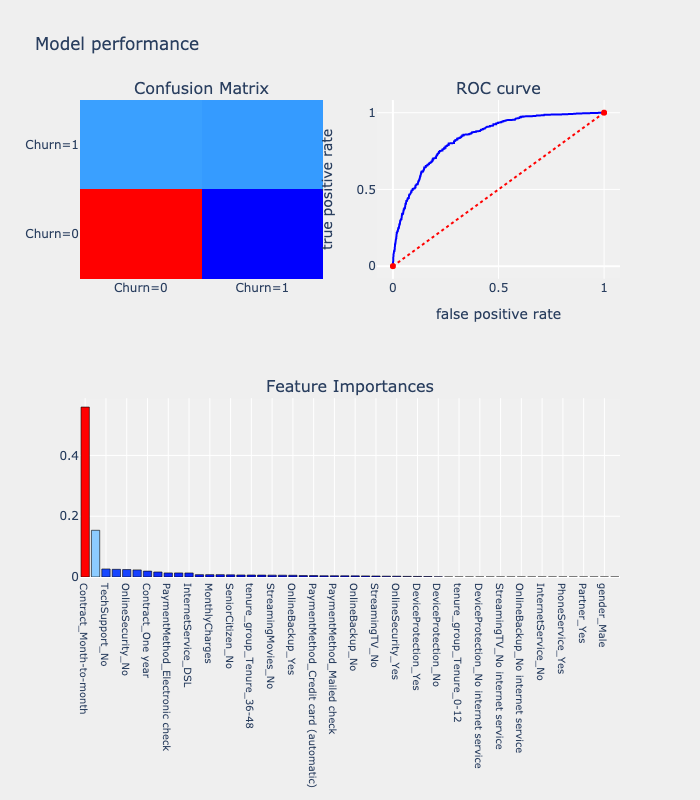

In [85]:
model_evaluator(best_models[-1], model_names[-1], X_test, Y_test)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.52      0.59       369

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Area under curve :  0.714793145041277 

Logistic Regression Accuracy is: 0.806
Logistic Regression precision is: 0.666
Logistic Regression recall is: 0.523


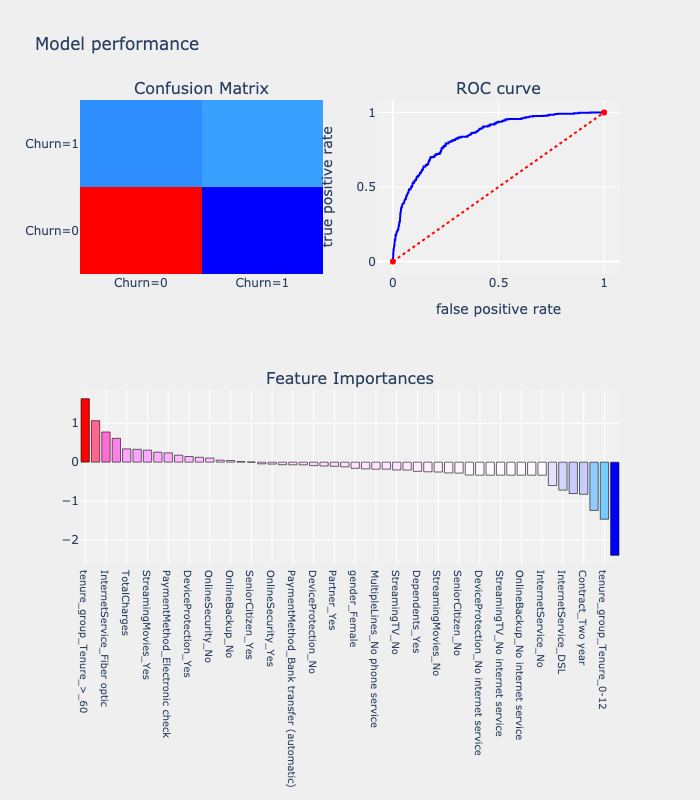

In [86]:
## model_names = ["Logistic Regression", "K-Nearest Neighbor", "Random Forest", "Gradient Boosting"]
model_evaluator(best_models[0], model_names[0], X_test, Y_test)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# print out confusion matrices
def plot_conf_matrix(ax, model_name, conf_matrx):
    
    class_names = ['Not Churned','Churned']
    compute_scores(model_name, conf_matrix)
    
    cax = ax.matshow(conf_matrix, interpolation='nearest',cmap = "Reds")
    plt.colorbar(cax, ax=ax)
    
    ax.set_title("Confusion matrix for " + model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)


Logistic Regression Accuracy is: 0.806
Logistic Regression precision is: 0.666
Logistic Regression recall is: 0.523
K-Nearest Neighbor Accuracy is: 0.770
K-Nearest Neighbor precision is: 0.575
K-Nearest Neighbor recall is: 0.466
Random Forest Accuracy is: 0.780
Random Forest precision is: 0.602
Random Forest recall is: 0.472
Gradient Boosting Accuracy is: 0.800
Gradient Boosting precision is: 0.662
Gradient Boosting recall is: 0.488


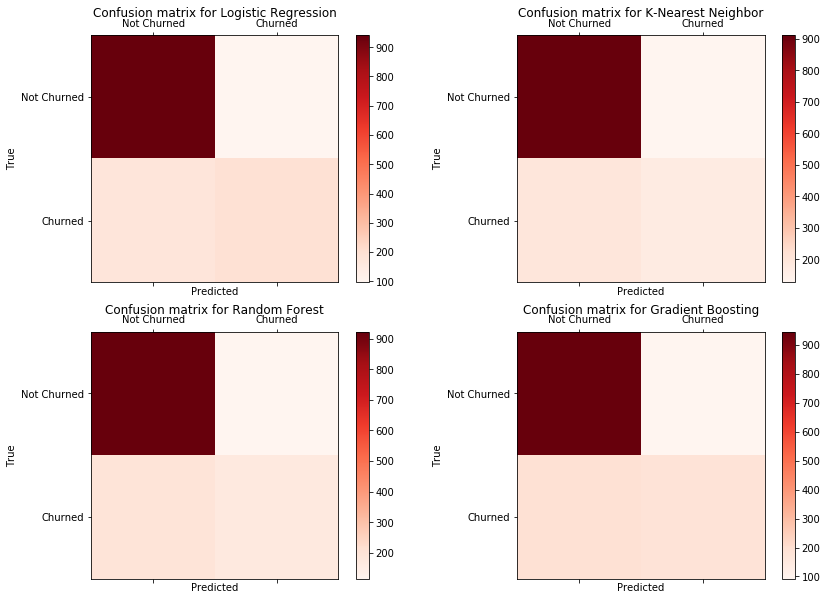

In [88]:
#%matplotlib inline

# Confusion matrix, accuracy, precison and recall for all four models:

fig, axes = plt.subplots(2,2, figsize=(14,10))
axis = [ axes[0][0], axes[0][1], axes[1][0], axes[1][1] ]

for i in range(len(best_models)):
    model_name = model_names[i]
    model = best_models[i]
    conf_matrix = confusion_matrix(Y_test, model.predict(X_test))
    plot_conf_matrix(axis[i], model_name, conf_matrix)

#plt.tight_layout()
plt.show()

## Part 3.4: Model Evaluation - ROC & AUC for all 4 models

## Logistic Regression, KNN, Random Forest and XGboost all have predict_prob() function

In [89]:
# define function for plotting ROC curve
def ROC_curve(model_name, ax, fpr, tpr):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr, label = model_name)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve - ' + model_name)
    ax.legend(loc='best')
    return

AUC for Logistic Regression:  0.8408929513187231
AUC for K-Nearest Neighbor:  0.8047670890967098
AUC for Random Forest:  0.8227399470526497
AUC for Gradient Boosting:  0.8397415814235214


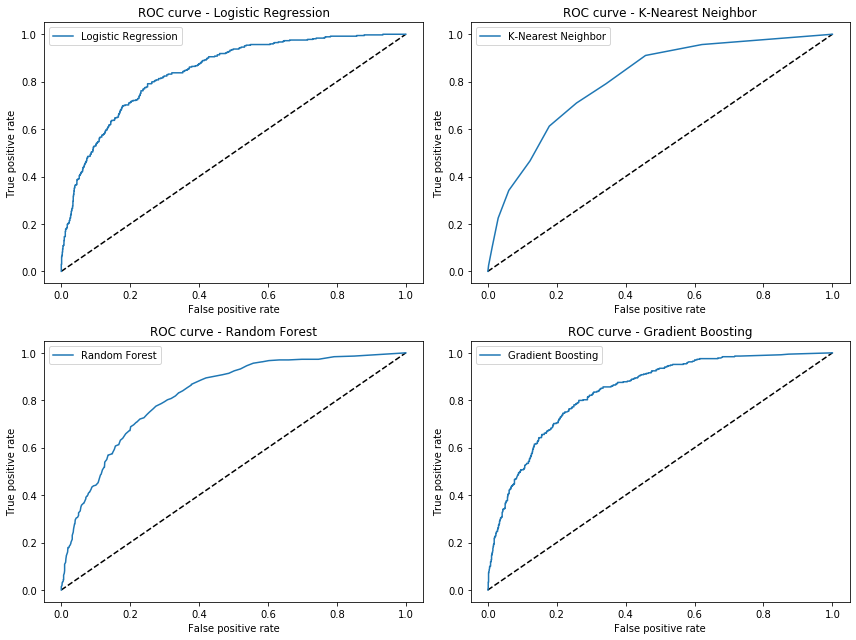

In [90]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fig, axes = plt.subplots(2,2, figsize=(12,9))
axis = [ axes[0][0], axes[0][1], axes[1][0], axes[1][1] ]

# Use predict_proba to get the probability of sample being positive:
for i in range(len(best_models)):
    
    model_name = model_names[i]
    model = best_models[i]
    
    ## compute the probability of sample being positive:
    pred_prob = model.predict_proba(X_test)[:, 1]    #因为1对应的那列是proba
    
    ## compute false-positive rate, true-positive rate:
    fpr, tpr, _ = roc_curve(Y_test, pred_prob)
    
    ## compute AUC:
    print("AUC for " + model_name + ": ", metrics.auc(fpr, tpr))
    
    ## plot ROC curve:
    ROC_curve(model_name, axis[i], fpr, tpr)

plt.tight_layout()